In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
from scipy.stats import norm
import seaborn as sns

In [3]:
heartrate=pd.read_csv('D:/csv/heart.csv')

In [4]:
heartrate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
heartrate.shape

(303, 14)

In [6]:
heartrate.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
heartrate['age']

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

In [8]:
heartrate.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
heartrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
heartrate['sex'] = heartrate['sex'].replace({0:'female',1:'male'})
heartrate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,male,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,male,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,male,0,130,131,0,1,115,1,1.2,1,1,3,0


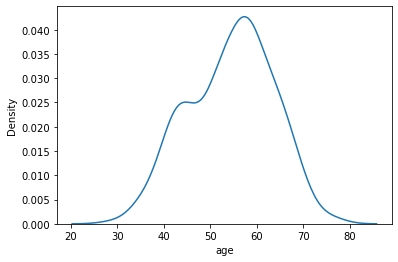

In [11]:
sns.kdeplot(heartrate.age)
plt.show()

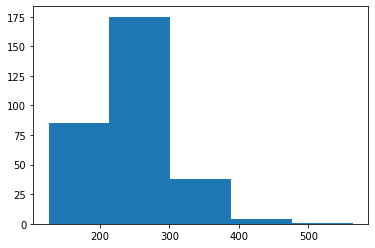

In [12]:
plt.hist(heartrate.chol, bins = 5)
plt.show()

The Histogram shows the cholestrol among the diiferent age group with trestbps.Cholestrol is high on between200-300


E:\New folder (9)\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


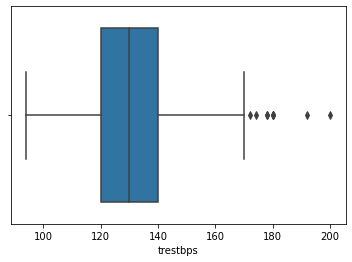

In [17]:
sns.boxplot(heartrate.trestbps)
plt.show()

 The darkspot outside the boxplot indicate the outlers where as the centre line of boxplot indicate median

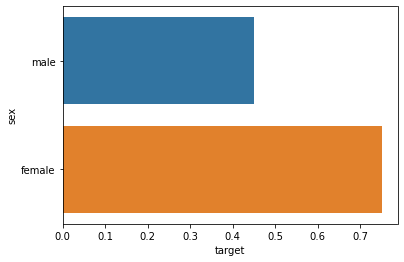

0    55.072464
1    44.927536
Name: target, dtype: float64

In [19]:
#drawing a bar plot of target by sex

sns.barplot( x='target',
    y='sex',
    hue=None,
    data=heartrate,
    ci=0)
plt.show()
#print percentages of females vs. males Heart Disease
heartrate['target'][heartrate.sex=='female'].value_counts(normalize=True)*100
heartrate['target'][heartrate.sex=='male'].value_counts(normalize=True)*100

We can clear see that female are suffering  more by heart disease then Male 


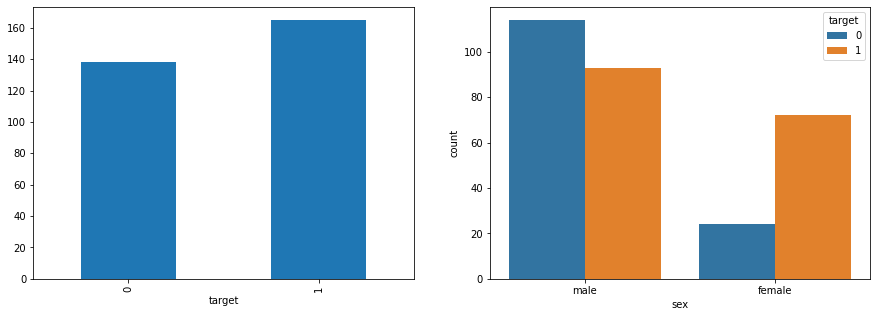

In [21]:
#creating a subplot

fig,a=plt.subplots(1,2,figsize=(15,5))
# creating bar plot using groupby
heartrate.groupby(['target']).count()['sex'].plot(kind='bar',ax=a[0])

# creating count plot
sns.countplot(x='sex',data=heartrate,hue='target',ax=a[1])
plt.show()

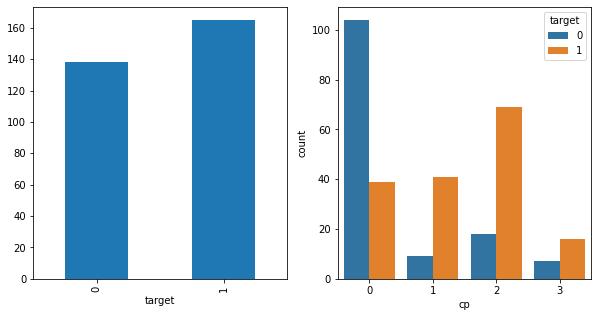

In [22]:
# creating subplot plot
fig ,a=plt.subplots(1,2,figsize=(10,5))
# creating bar plot using groupby
heartrate.groupby(['target']).count()['cp'].plot(kind='bar',ax=a[0])

# create count plot
sns.countplot(x='cp',data=heartrate,hue='target',ax=a[1])
plt.show()

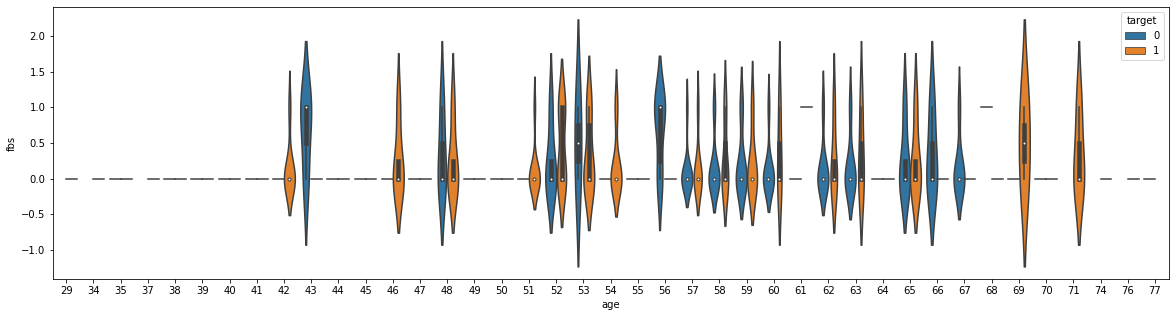

In [23]:
# creating subplot plot

fig,a=plt.subplots(figsize=(20,5))

# creating violinplot plot using groupby

g1=heartrate.groupby(['fbs']).count()['age']

sns.violinplot(x='age',y='fbs',hue='target',data=heartrate)
plt.show()


This plot is create to check the fasting,blood sugar and age vs target

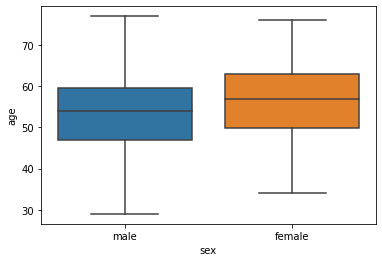

In [24]:
# creating boxplot
sns.boxplot(x='sex',y='age',data=heartrate)
plt.show()

### Creating a Stacked bar chart for showing target & Sex

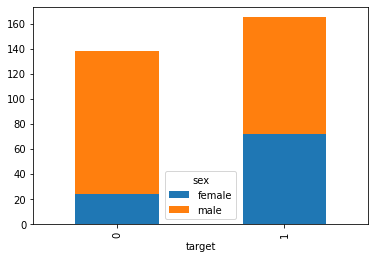

In [25]:
pd.crosstab(heartrate['target'],heartrate['sex']).plot(kind='bar',stacked=True)
plt.show()


### Creating a scatter plot for showing age & st_depression


E:\New folder (9)\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


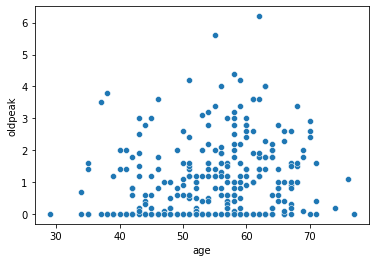

In [27]:
sns.scatterplot(heartrate['age'],heartrate['oldpeak'])
plt.show()

1. We can see the age is group if varrying from 20 to 80 years and also two dome which mean data is not normal.
2. Majority of the cases are having cholestrol between the range of 200-300  while very few cases have between 400-600.
3. We can clear see that female are suffering  more by heart disease then Male.
4.Allthough here the case of heart disease are more in chest pain  type 0 but critical condn are observe in type 2.
5.Most of the cases are with female consider there age as the one factor which means femle suffer it more at early age then male.